<a href="https://colab.research.google.com/github/LucasGCRamos/PISI3_grupo04_2024.2/blob/main/Clusteriza%C3%A7%C3%A3o_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
import pandas as pd

df = pd.read_parquet('/content/predict_dropout.parquet')
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

Target
2    49.932188
1    32.120253
3    17.947559
Name: proportion, dtype: float64


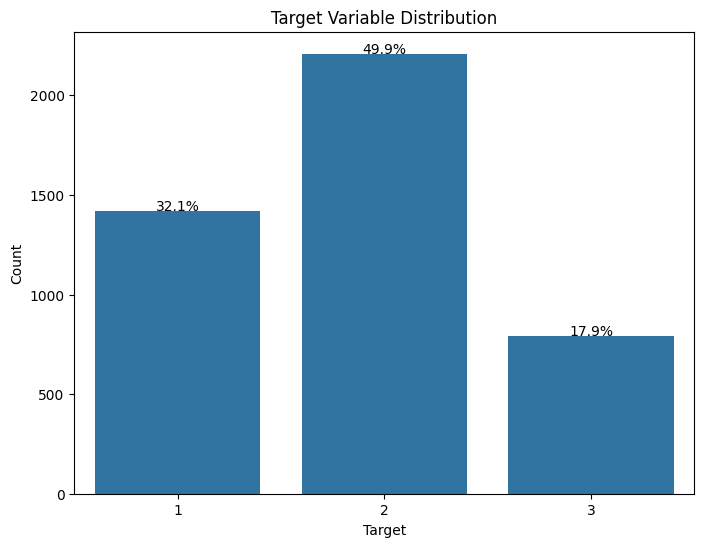

In [14]:
import matplotlib.pyplot as plt
# Calculate the percentage distribution of the target variable
target_percentage = df['Target'].value_counts(normalize=True) * 100

# Print the percentage distribution
print(target_percentage)

# Optional: visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

# Add percentage labels to the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 1, '{:.1f}%'.format(height / len(df) * 100), ha="center")

plt.show()


In [15]:
min_age = df['Age at enrollment'].min()
df['Age Group'] = (df['Age at enrollment'] - min_age) // 10

# Display the first few rows to show the new 'Age Group' column
print(df[['Age at enrollment', 'Age Group']].head())


   Age at enrollment  Age Group
0                 20          0
1                 19          0
2                 19          0
3                 20          0
4                 45          2


In [16]:
# Calculate percentage distribution of marital status
marital_percentage = df['Marital status'].value_counts(normalize=True) * 100

# Identify categories with less than 2% representation
low_percentage_categories = marital_percentage[marital_percentage < 2].index

# Group low percentage categories into a single category named 'Other'
df['Marital status'] = df['Marital status'].replace(low_percentage_categories, 3)

# Print the updated marital status distribution
print(df['Marital status'].value_counts(normalize=True) * 100)

Marital status
1    88.584991
2     8.566908
4     2.056962
3     0.791139
Name: proportion, dtype: float64


In [17]:
# Cria duas variáveis que vão ser dois dataframes distintos, o primeiro vai ser um dataframe cujo os valores target são 2. E depois um segunda variavel vai ser tambem um dataframe mas cujo os dados do target são 1( chame essas variaveis de aprovados e reprovados, respectivamente)

aprovados = df[df['Target'] == 2]
reprovados = df[df['Target'] == 1]

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Columns to exclude from normalization
columns_to_exclude = ['Marital status', 'Target', 'Age Group', 'Father\'s qualification', 'Mother\'s qualification']

# Select columns for normalization
columns_to_normalize = [col for col in df.columns if col not in columns_to_exclude]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows of the normalized DataFrame
print(df.head())

aprovados = df[df['Target'] == 2]
reprovados = df[df['Target'] == 1]

   Marital status  Application mode  Application order    Course  \
0               1          0.285714           0.555556  0.013858   
1               1          0.250000           0.111111  0.925989   
2               1          0.000000           0.555556  0.907512   
3               1          0.285714           0.222222  0.978108   
4               2          0.678571           0.111111  0.801466   

   Daytime/evening attendance\t  Previous qualification  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           0.0                     0.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        0.284211          0.0                      19   
1                        0.684211          0.0                       1   
2             

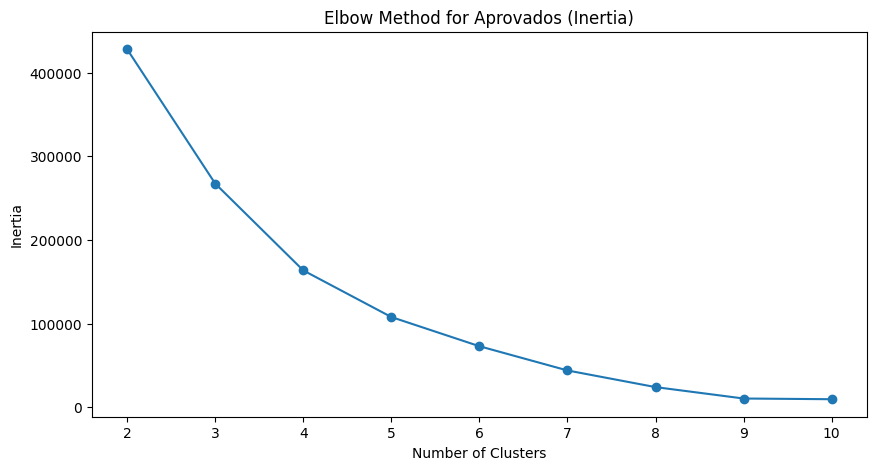

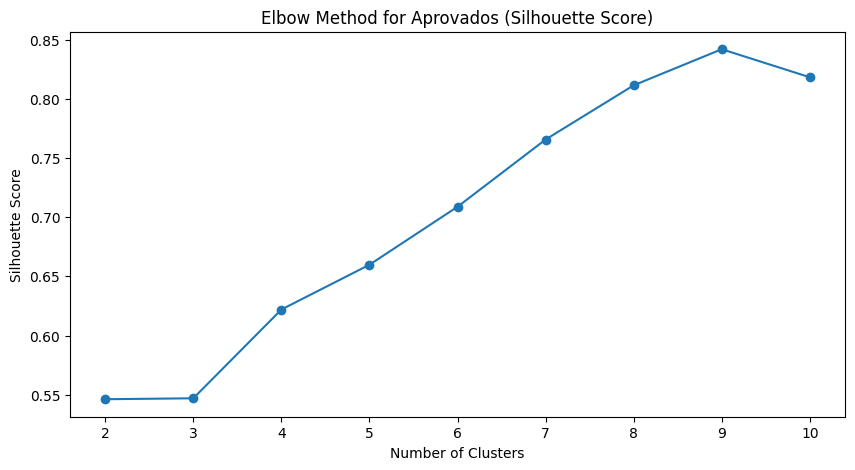

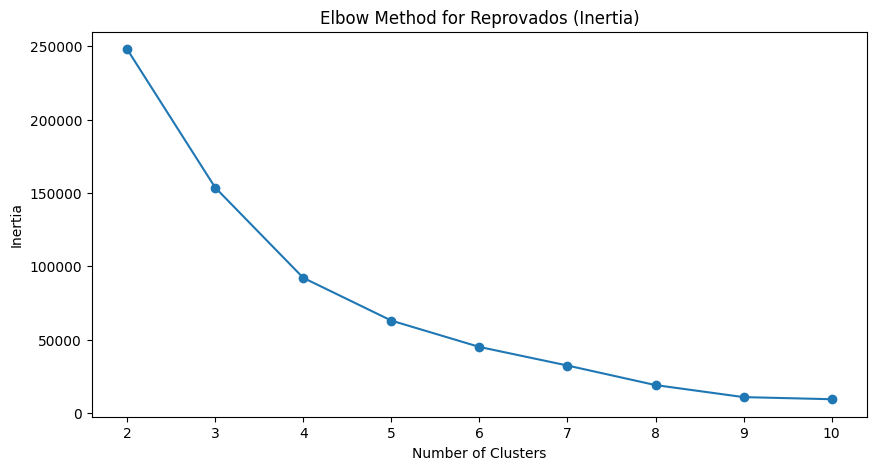

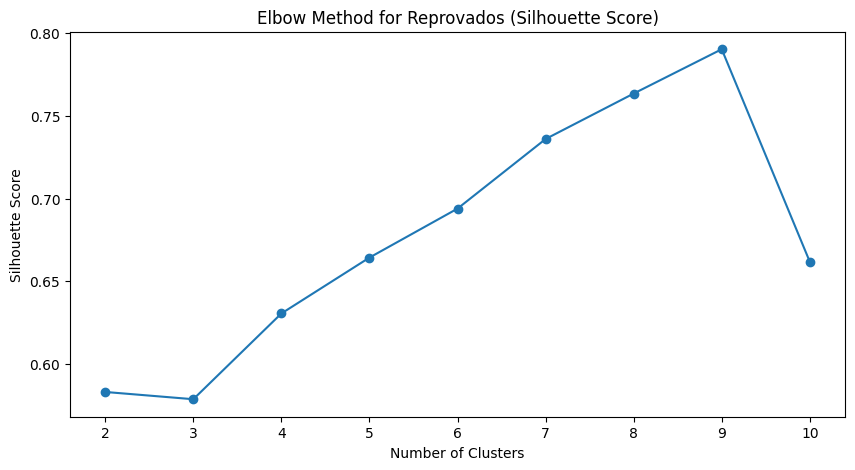

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to calculate inertia and silhouette score for a given number of clusters
def calculate_metrics(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    return inertia, silhouette_avg


# Elbow method for aprovados
inertia_aprovados = []
silhouette_aprovados = []
k_range = range(2, 11)  # Test clusters from 2 to 10

for k in k_range:
    inertia, silhouette = calculate_metrics(aprovados.drop(columns=['Target']), k)
    inertia_aprovados.append(inertia)
    silhouette_aprovados.append(silhouette)

# Plot inertia for aprovados
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia_aprovados, marker='o')
plt.title('Elbow Method for Aprovados (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette score for aprovados
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_aprovados, marker='o')
plt.title('Elbow Method for Aprovados (Silhouette Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Elbow method for reprovados
inertia_reprovados = []
silhouette_reprovados = []
k_range = range(2, 11)

for k in k_range:
    inertia, silhouette = calculate_metrics(reprovados.drop(columns=['Target']), k)
    inertia_reprovados.append(inertia)
    silhouette_reprovados.append(silhouette)

# Plot inertia for reprovados
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia_reprovados, marker='o')
plt.title('Elbow Method for Reprovados (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette score for reprovados
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_reprovados, marker='o')
plt.title('Elbow Method for Reprovados (Silhouette Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [20]:
# Calculate silhouette score for aprovados with 5 clusters
kmeans_aprovados = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_aprovados.fit(aprovados.drop(columns=['Target']))
silhouette_aprovados_5 = silhouette_score(aprovados.drop(columns=['Target']), kmeans_aprovados.labels_)
print(f"Silhouette Score for Aprovados (5 clusters): {silhouette_aprovados_5}")

# Calculate silhouette score for reprovados with 5 clusters
kmeans_reprovados = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_reprovados.fit(reprovados.drop(columns=['Target']))
silhouette_reprovados_5 = silhouette_score(reprovados.drop(columns=['Target']), kmeans_reprovados.labels_)
print(f"Silhouette Score for Reprovados (5 clusters): {silhouette_reprovados_5}")


Silhouette Score for Aprovados (5 clusters): 0.6598277273164882
Silhouette Score for Reprovados (5 clusters): 0.6643588486965879


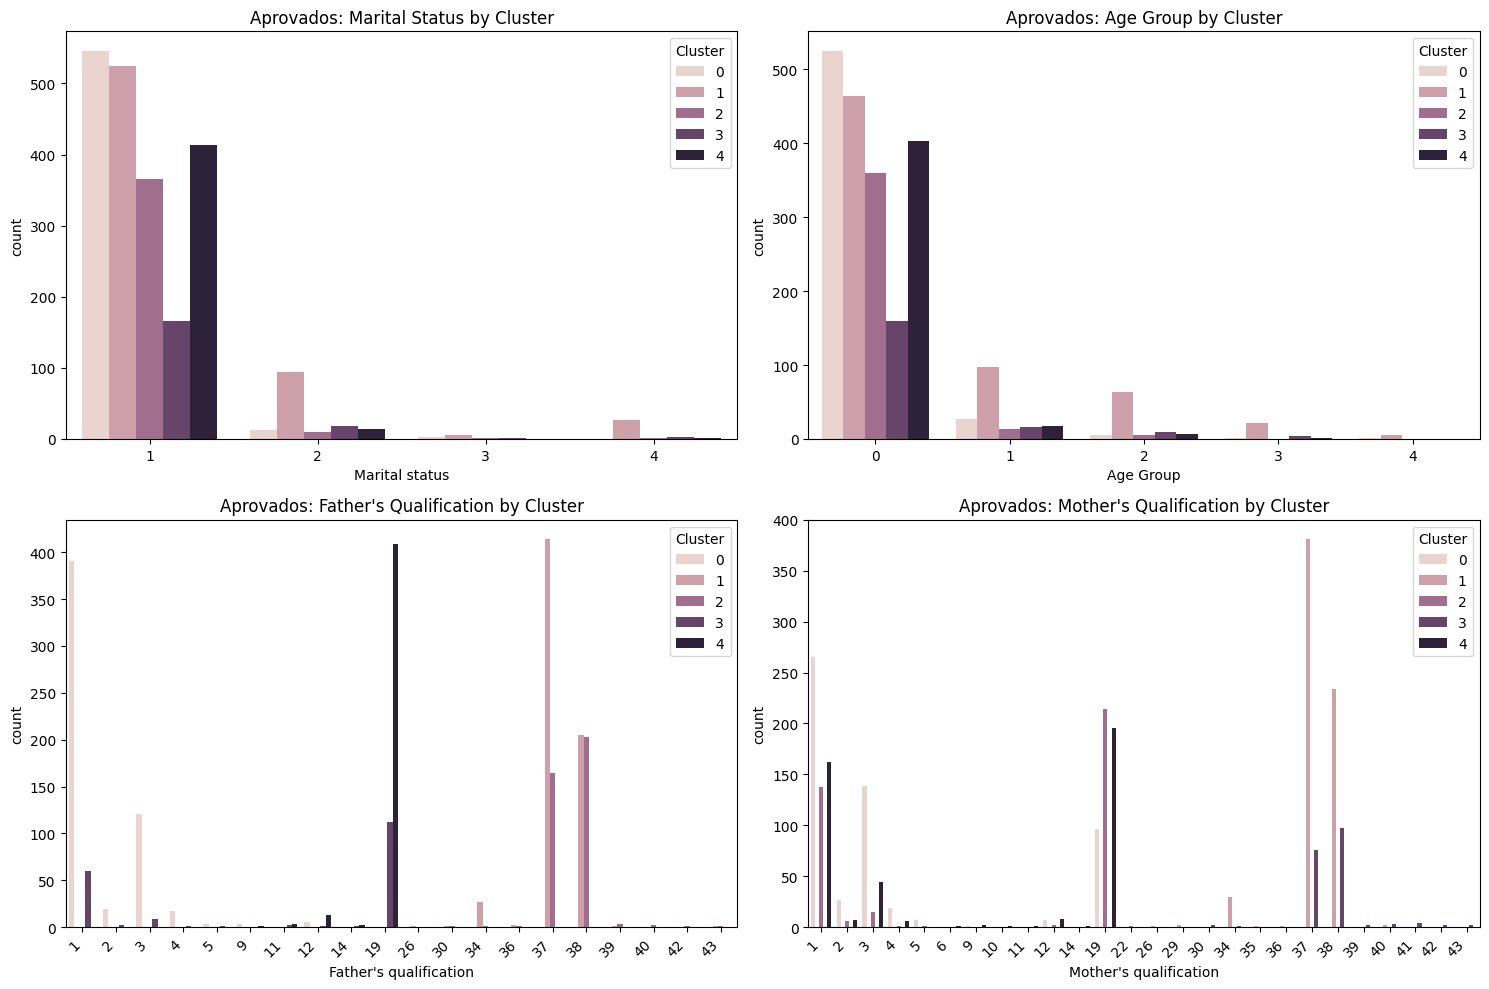

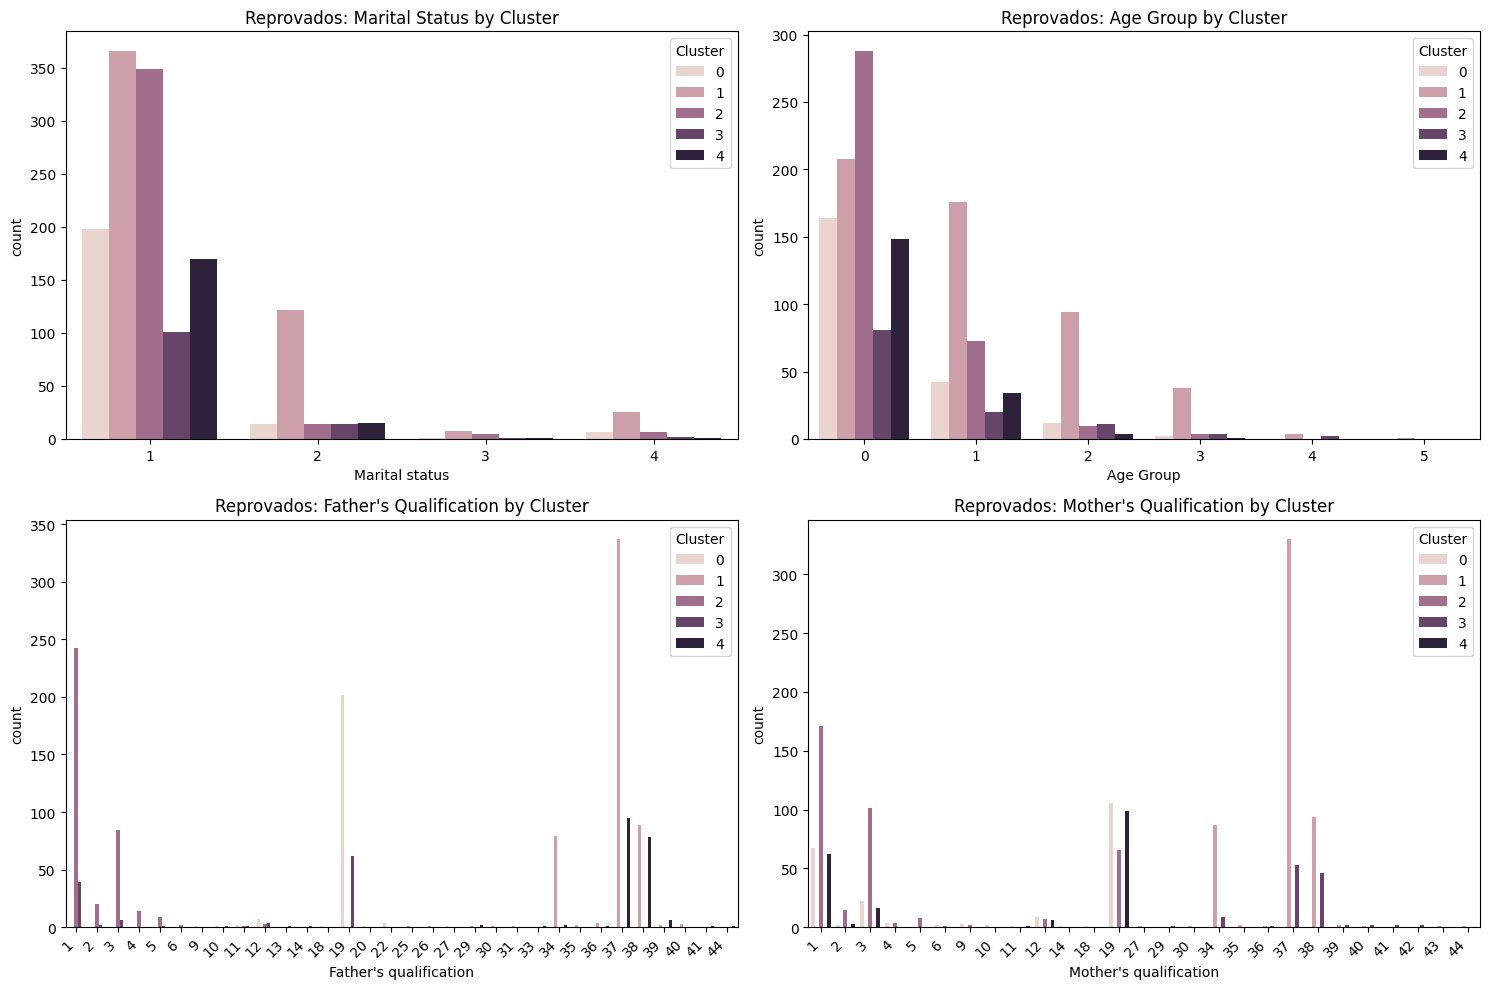

In [22]:
import matplotlib.pyplot as plt
# Add cluster labels to the dataframes
aprovados.loc[:, 'Cluster'] = kmeans_aprovados.labels_
reprovados.loc[:, 'Cluster'] = kmeans_reprovados.labels_

# Function to create visualizations for each cluster
def visualize_clusters(df, title):
    plt.figure(figsize=(15, 10))

    # Marital Status
    plt.subplot(2, 2, 1)
    sns.countplot(x='Marital status', hue='Cluster', data=df)
    plt.title(f'{title}: Marital Status by Cluster')

    # Age Group
    plt.subplot(2, 2, 2)
    sns.countplot(x='Age Group', hue='Cluster', data=df)
    plt.title(f'{title}: Age Group by Cluster')

    # Father's Qualification
    plt.subplot(2, 2, 3)
    sns.countplot(x='Father\'s qualification', hue='Cluster', data=df)
    plt.title(f'{title}: Father\'s Qualification by Cluster')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Mother's Qualification
    plt.subplot(2, 2, 4)
    sns.countplot(x='Mother\'s qualification', hue='Cluster', data=df)
    plt.title(f'{title}: Mother\'s Qualification by Cluster')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()


# Visualize clusters for aprovados
visualize_clusters(aprovados, 'Aprovados')

# Visualize clusters for reprovados
visualize_clusters(reprovados, 'Reprovados')
